In [1]:
import os

os.chdir("..")

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm.auto as tqdm
from urbanstats.games.quiz_analysis import get_full_statistics, questions
from urbanstats.games.quiz import display_question, quiz_is_guaranteed_past
# from urbanstats.games.quiz import display_question, quiz_is_guaranteed_past, compute_fractional_days

/home/kavi/anaconda3/envs/urbanstats/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [4]:
plt.rcParams["font.family"] = "monospace"

In [5]:
# today_problem = int(compute_fractional_days("America/New_York"))

In [6]:
result = get_full_statistics(after_problem=49, debug=False)
num_users_by_problem = result.groupby("problem").count().user_id
means = result[["problem", "score", *questions]].groupby("problem").mean()

In [7]:
is_valid_day = lambda x: quiz_is_guaranteed_past(x) is None and x > 50

In [8]:
mask = [is_valid_day(x) for x in num_users_by_problem.index]
xs, ys = num_users_by_problem.index[mask], num_users_by_problem[mask]

In [9]:
import sklearn.linear_model

0.007216102842923955


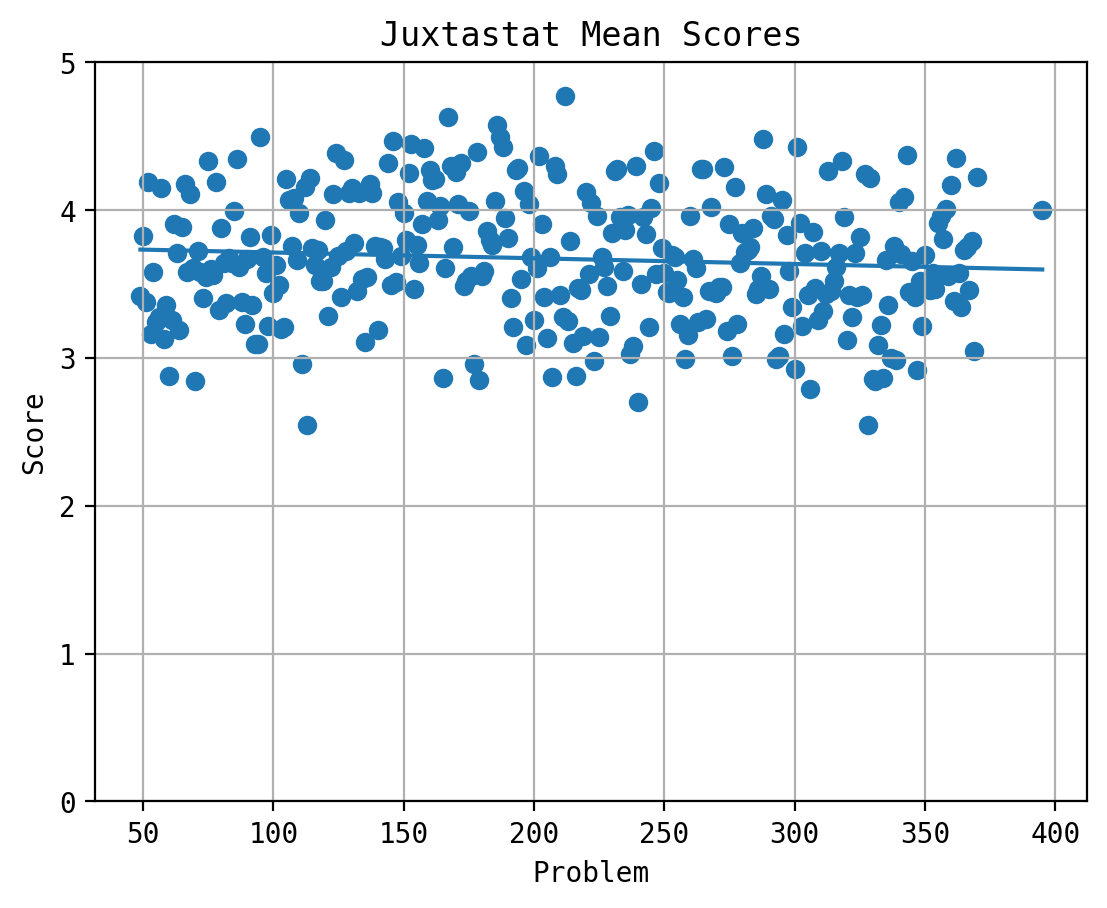

In [10]:
plt.figure(dpi=200, facecolor="white")
plt.title("Juxtastat Mean Scores")
plt.scatter(means.index, means.score)
x = np.array(means.index)[:, None]
lin = sklearn.linear_model.LinearRegression().fit(
    x, means.score
)
[m], b = lin.coef_, lin.intercept_
print(lin.score(x, means.score))
plt.plot(means.index, m * means.index + b)
plt.ylim(0, 5)
plt.xlabel("Problem")
plt.ylabel("Score")
plt.grid()

In [11]:
from datetime import timedelta
import pandas as pd

In [12]:
flat_qs = pd.DataFrame(
    dict(
        correct=np.concatenate([means[question] for question in questions]),
        problem=np.concatenate([means[question].index for question in questions]),
        idx=np.concatenate(
            [
                np.zeros_like(means[question], dtype=np.long) + i
                for i, question in enumerate(questions)
            ]
        ),
    )
).sort_values("correct")
flat_qs["count"] = np.array(result.groupby("problem").count().user_id[flat_qs.problem])
flat_qs = flat_qs[flat_qs["count"] > 10].copy()

In [13]:
def display_row(row):
    result = f"{row.correct:.0%} correct."
    result += f" Juxtastat {row.problem:.0f} q{row.idx + 1:.0f}\n"
    with open(f"/home/kavi/temp/site/quiz/{row.problem:.0f}") as f:
        q = json.load(f)[int(row.idx)]
    result += "  " + display_question(q["question"])
    result += "\n    a) " + q["longname_a"]
    result += "\n    b) " + q["longname_b"]
    return result

In [14]:
for i, (_, worst) in enumerate(flat_qs[:5].iterrows(), 1):
    print(f"{i}th worst performance: " + display_row(worst))

1th worst performance: 11% correct. Juxtastat 135 q5
  Which has more hours of sun per day on average? (population weighted)
    a) DC Circuit, USA
    b) 1st Circuit, USA
2th worst performance: 11% correct. Juxtastat 113 q5
  Which has a higher % of people who commute by bike?
    a) 1st Circuit, USA
    b) 10th Circuit, USA
3th worst performance: 12% correct. Juxtastat 240 q3
  Which has a higher mean daily high temperature in summer (population weighted)?
    a) Chula Vista city, California, USA
    b) Columbus city, Ohio, USA
4th worst performance: 12% correct. Juxtastat 336 q5
  Which has a higher % of people who are renters?
    a) North Dakota, USA
    b) Tennessee, USA
5th worst performance: 12% correct. Juxtastat 154 q2
  Which has a higher population-weighted density (r=1km)?
    a) Webb County, Texas, USA
    b) Onondaga County, New York, USA


In [15]:
for i, (_, worst) in enumerate(flat_qs[::-1][:5].iterrows(), 1):
    print(f"{i}th best performance: " + display_row(worst))

1th best performance: 100% correct. Juxtastat 155 q1
  Which has a higher mean daily high temperature in summer (population weighted)?
    a) Buffalo city, New York, USA
    b) Chandler city, Arizona, USA
2th best performance: 100% correct. Juxtastat 350 q1
  Which has a higher % of people who speak spanish at home?
    a) CA-49, USA
    b) IN-03, USA
3th best performance: 99% correct. Juxtastat 178 q1
  Which has a higher mean daily high temperature (population weighted)?
    a) 5th Circuit, USA
    b) 2nd Circuit, USA
4th best performance: 99% correct. Juxtastat 306 q1
  Which has a higher % of people who are Hispanic?
    a) Florida, USA
    b) Michigan, USA
5th best performance: 99% correct. Juxtastat 236 q1
  Which has a higher % of people who are White?
    a) New Hampshire, USA
    b) Hawaii, USA
